In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score

sns.set_style("whitegrid")

%matplotlib inline

SEED = 222
np.random.seed(SEED)

In [10]:
data_set = pd.read_csv('dataset/input.csv')

In [11]:
data_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 11 columns):
cand_pty_affiliation    100000 non-null object
cand_office_st          100000 non-null object
cand_office             100000 non-null object
cand_status             100000 non-null object
rpt_tp                  100000 non-null object
transaction_tp          100000 non-null object
entity_tp               100000 non-null object
state                   100000 non-null object
classification          100000 non-null object
cycle                   100000 non-null float64
transaction_amt         100000 non-null float64
dtypes: float64(2), object(9)
memory usage: 8.4+ MB


In [12]:
data_set.head(10)

,cand_pty_affiliation,cand_office_st,cand_office,cand_status,rpt_tp,transaction_tp,entity_tp,state,classification,cycle,transaction_amt
0,REP,US,P,C,Q3,15,IND,NY,Engineer,2016.0,500.0
1,DEM,US,P,C,M5,15E,IND,OR,Math-Stat,2016.0,50.0
2,DEM,US,P,C,M3,15,IND,TX,Scientist,2008.0,250.0
3,DEM,US,P,C,Q2,15E,IND,IN,Math-Stat,2016.0,250.0
4,REP,US,P,C,12G,15,IND,MA,Engineer,2016.0,184.0
5,DEM,US,P,C,M10,15,IND,NM,Engineer,2008.0,200.0
6,DEM,US,P,C,M7,15,IND,MT,Scientist,2012.0,500.0
7,DEM,US,P,C,M7,15,IND,FL,Engineer,2008.0,250.0
8,REP,LA,H,C,12P,15,IND,LA,Engineer,2008.0,1000.0
9,DEM,MD,S,C,Q2,15,IND,MD,Scientist,2016.0,100.0


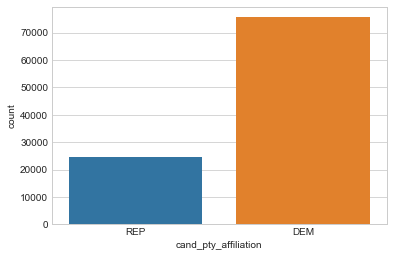

In [14]:
sns.countplot(x='cand_pty_affiliation', data=data_set)

In [17]:
def get_train_test(test_size = 0.95):
    y = 1 * (data_set.cand_pty_affiliation == "REP")
    X = data_set.drop(["cand_pty_affiliation"], axis=1)
    X = pd.get_dummies(X, sparse=True)
    X.drop(X.columns[X.std() == 0], axis=1, inplace=True)
    return train_test_split(X, y, test_size=test_size, random_state=SEED)

In [18]:
xtrain, xtest, ytrain, ytest = get_train_test()

In [20]:
import pydotplus
from IPython.display import Image
from sklearn.metrics import roc_auc_score
from sklearn.tree import DecisionTreeClassifier, export_graphviz

In [21]:
def print_graph(clf, feature_names):
    """Print decision tree."""
    graph = export_graphviz(
        clf,
        label="root",
        proportion=True,
        impurity=False, 
        out_file=None, 
        feature_names=feature_names,
        class_names={0: "D", 1: "R"},
        filled=True,
        rounded=True
    )
    graph = pydotplus.graph_from_dot_data(graph)  
    return Image(graph.create_png())

Decision tree ROC-AUC score: 0.672


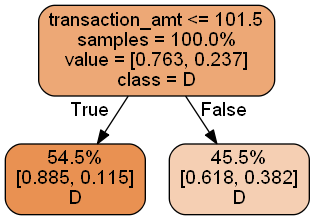

In [22]:
t1 = DecisionTreeClassifier(max_depth=1, random_state=SEED)
t1.fit(xtrain, ytrain)
p = t1.predict_proba(xtest)[:, 1]

print("Decision tree ROC-AUC score: %.3f" % roc_auc_score(ytest, p))
print_graph(t1, xtrain.columns)

Decision tree ROC-AUC score: 0.751


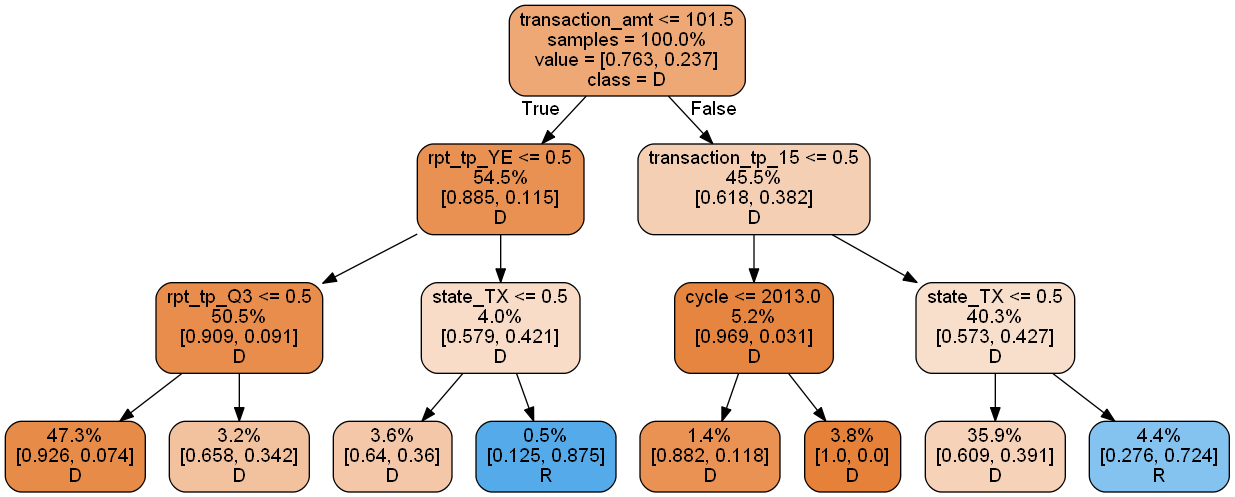

In [23]:
t2 = DecisionTreeClassifier(max_depth=3, random_state=SEED)
t2.fit(xtrain, ytrain)
p = t2.predict_proba(xtest)[:, 1]

print("Decision tree ROC-AUC score: %.3f" % roc_auc_score(ytest, p))
print_graph(t2, xtrain.columns)

Decision tree ROC-AUC score: 0.740


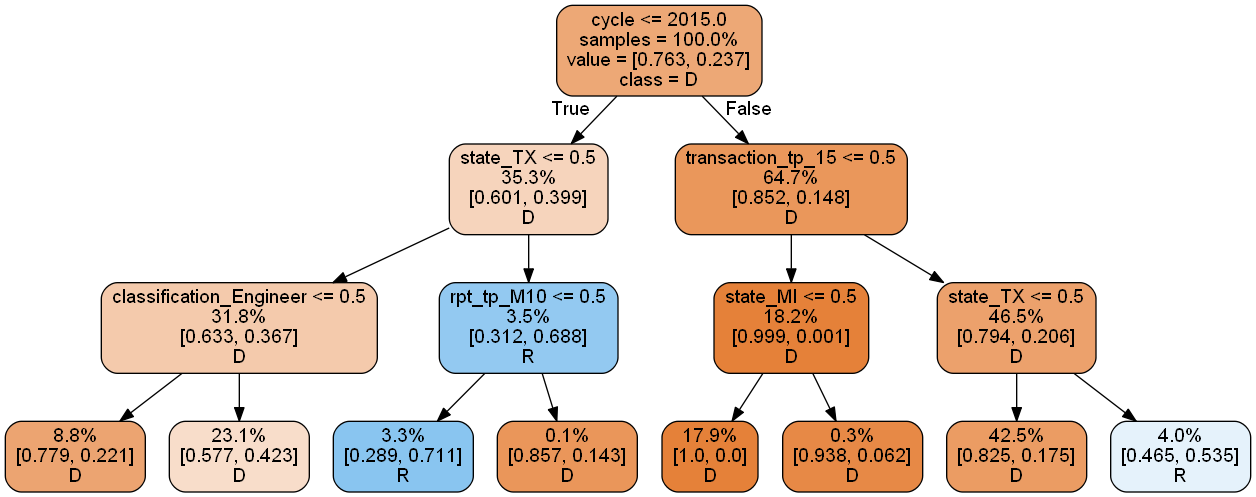

In [24]:
drop = ["transaction_amt"]

xtrain_slim = xtrain.drop(drop, 1)
xtest_slim = xtest.drop(drop, 1)

t3 = DecisionTreeClassifier(max_depth=3, random_state=SEED)
t3.fit(xtrain_slim, ytrain)
p = t3.predict_proba(xtest_slim)[:, 1]


print("Decision tree ROC-AUC score: %.3f" % roc_auc_score(ytest, p))
print_graph(t3, xtrain_slim.columns)

In [26]:
p1 = t2.predict_proba(xtest)[:, 1]
p2 = t3.predict_proba(xtest_slim)[:, 1]

print(p1)

pd.DataFrame({"full_data": p1,
              "red_data": p2}).corr()

[0.39074693 0.07363521 0.39074693 ... 0.39074693 0.39074693 0.07363521]


,full_data,red_data
full_data,1.000000,0.669128
red_data,0.669128,1.000000


In [27]:
p1 = t2.predict_proba(xtest)[:, 1]
p2 = t3.predict_proba(xtest_slim)[:, 1]
p = np.mean([p1, p2], axis=0)
print("Average of decision tree ROC-AUC score: %.3f" % roc_auc_score(ytest, p))

Average of decision tree ROC-AUC score: 0.783
